# Data Prep

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv('original_dataset.csv')
df.head()

Checking DataFrame coloum type 

In [ ]:
df.info()

Spliting to train and test 

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=25)

Read train data frame head 

In [ ]:
train_df.head()


Read test data frame head 

In [ ]:
test_df.head()

count train and test dataset 

In [ ]:
train_df.count()

In [ ]:
test_df.count()

Export train and test dataframe

In [ ]:
train_df.to_csv('train.csv', index = False)
test_df.to_csv('test.csv', index = False)

## check n run

In [2]:
import pandas as pd

In [2]:
test_df  = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
additional_tweet = pd.read_csv('tweet_only.csv')

additional_tweet = additional_tweet.rename(columns={'Tweet': 'text'})

In [3]:
test_df.head()

,text,label
0,titisan air mata kini kekeringan,0
1,tni polri serta satpol pp dki menyambangi loka...,0
2,"Gempa Mag:5.2, 31-Jan-21 16:28:55 WIB, Lok:5....",1
3,berbagai klaster penyebaran covid 19 kita moni...,0
4,saya tetap optimistis perekonomian indonesia a...,0


In [4]:
train_df.head()

,text,label
0,"Gempa Mag:4.8, 05/01/2021 18:56:21 (Pusat gem...",1
1,idha nama pemilik perusahaan yg bikin banjir a...,0
2,web kritik film danieldokter tariz aryaapepe r...,0
3,penjelasan fpi ganti nama jadi front persatuan...,0
4,"Gempa Mag:5.0, 26-Oct-20 15:26:37 WIB, Lok:0....",1


In [5]:
additional_tweet.head()

,text
0,akhirny naik gojek w malas banjir banjiran
1,Banjir luar dalam
2,bismillah banjir congrats
3,huaa naek kreta ekonomi berjamjam super tegak ...
4,"kata teman uwe,\nhari ini di laman jual beli O..."


In [6]:
test_df.count()

text     1815
label    1815
dtype: int64

In [7]:
train_df.count()

text     4234
label    4234
dtype: int64

In [8]:
additional_tweet.count()

text    30000
dtype: int64

# Building label using RubrixUI

## Import Dataset to Rubrix

In [9]:
# run Docker
# run [ python -m rubrix ] on Terminal 1st

In [1]:
import rubrix as rb

In [12]:
# build records from the train dataset
records = [
    rb.TextClassificationRecord(
        text=row.text,
        #metadata={"split": "train"}
    )
    for i,row in additional_tweet.iterrows() #30,000
]

# build records from the test dataset with annotation
labels = ["NOT_ND", "ND"]
records += [
    rb.TextClassificationRecord(
        text=row.text,
        annotation=labels[row.label],
        #metadata={"split": "test"}
    )
    for i,row in test_df.iterrows() #1,815
]

# log records to Rubrix
rb.log(records, name="ws_natural_disaster_v")

100%|███████████████████████████████████████████████████████████████████████████| 31815/31815 [03:14<00:00, 163.77it/s]

31815 records logged to http://localhost:6900/datasets/rubrix/ws_natural_disaster_vi


BulkResponse(dataset='ws_natural_disaster_vi', processed=31815, failed=0)

## Evaluate Weak Label

In [3]:
from rubrix.labeling.text_classification import WeakLabels

weak_labels = WeakLabels(dataset="ws_natural_disaster_v")

C:\Users\arkan\anaconda3\envs\Skripshit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Applying rules: 100%|█████████████████████████████████████████████████████████| 31815/31815 [00:01<00:00, 29166.54it/s]


In [4]:
weak_labels.summary()

,label,coverage,annotated_coverage,overlaps,conflicts,correct,incorrect,precision
wib,{ND},0.021059,0.298072,0.017727,0.002860,537,4,0.992606
bmkg,{ND},0.029954,0.277686,0.029923,0.011944,493,11,0.978175
lok,{ND},0.010561,0.166391,0.010530,0.000283,302,0,1.000000
mmi,{ND},0.010813,0.187879,0.010813,0.000126,341,0,1.000000
dirasakan,{ND},0.011661,0.187328,0.011630,0.000503,339,1,0.997059
laut,{ND},0.016030,0.129477,0.015936,0.007606,230,5,0.978723
berada,{ND},0.012384,0.139394,0.012353,0.003929,248,5,0.980237
magnitud*,{ND},0.008581,0.091460,0.008581,0.002609,164,2,0.987952
gempa,{ND},0.245702,0.400551,0.192268,0.164388,520,207,0.715268
tsunami,{ND},0.187459,0.077686,0.141506,0.128241,111,30,0.787234


In [5]:
from rubrix.labeling.text_classification import Snorkel

# create the label model
label_model = Snorkel(weak_labels)

# fit the model
label_model.fit()

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 784.00epoch/s]


In [6]:
print(label_model.score(output_str=True))

              precision    recall  f1-score   support

      NOT_ND       0.85      0.93      0.88       702
          ND       0.94      0.86      0.90       874

    accuracy                           0.89      1576
   macro avg       0.89      0.90      0.89      1576
weighted avg       0.90      0.89      0.89      1576



## Prep train set

In [7]:
# get records with the predictions from the label model

# you can replace this line with
# records = rb.read_datasets(
#    load_dataset("rubrix/news", split="train"),
#    task="TextClassification",
# )
# we could also use the `weak_labels.label2int` dict

records = label_model.predict()
label2int = {"NOT_ND":0, "ND": 1}

# extract training data
X_train = [rec.text for rec in records]
y_train = [label2int[rec.prediction[0][0]] for rec in records]

In [8]:

# quick look at our training data with the weak labels from our label model
with pd.option_context('display.max_colwidth', None):
    display(pd.DataFrame({"text": X_train, "label": y_train}))


,text,label
0,"Bener2 ini jumat berkah dari malem ketemu malem ujan,semoga ga banjir ya Allah 😭",0
1,"Bencana geologi : gempabumi, tsunami, letusan gunung berapi, dan tanah longsor.",0
2,Liverpool Tsunami cidera ini namanya,0
3,"Kemaren pas nerjang banjir kira kira 3/4 ban motor, di liatin sama orang orang. Mungkin dlm hati mereka “gila juga ni cewe”",0
4,Gempa...?,1
...,...,...
26210,pemda depok pas bikin berita angin puting beliung kata putingnya disensor jadi put*ng gak ya,1
26211,puting beliung apa pitung beliung?,0
26212,alias bgsttt ati lu dari apaan mba😭 kuat bgt tahan api air tsunami badai gempa,0
26213,"Non stop gempa dari selasa. Semalem ga bisa tdur nyenyak. Puncaknya siang tadi gempa 5.4. Pengen donlot app bmkg tapi takut malah jadi parno 🥲 Hujan deres pula, ini orang2 mess pada rencana bermalam rame2 dibawah, biar klo gempa lagi keluarnya gampang 🥲",0


In [9]:
#records = label_model.predict()
#label2int = {'NOT_ND': 0, 'ND': 1}

In [10]:
autolabeled_data = pd.DataFrame(
    [
        {"text": rec.text, "label": label2int[rec.prediction[0][0]]}
        for rec in records
    ]
)

In [11]:
autolabeled_data

,text,label
0,Bener2 ini jumat berkah dari malem ketemu male...,0
1,"Bencana geologi : gempabumi, tsunami, letusan ...",0
2,Liverpool Tsunami cidera ini namanya,0
3,Kemaren pas nerjang banjir kira kira 3/4 ban m...,0
4,Gempa...?,1
...,...,...
26210,pemda depok pas bikin berita angin puting beli...,1
26211,puting beliung apa pitung beliung?,0
26212,alias bgsttt ati lu dari apaan mba😭 kuat bgt t...,0
26213,Non stop gempa dari selasa. Semalem ga bisa td...,0


In [12]:
autolabeled_data.to_csv('autolabelled_dataset_v.csv', index = False)

<Axes: xlabel='label', ylabel='count'>

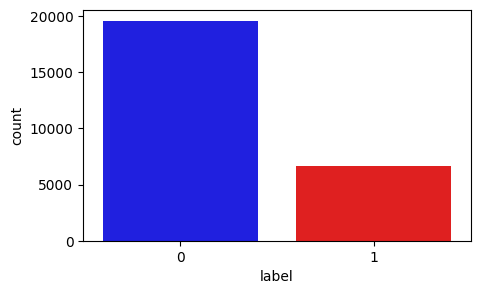

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Visualize the output (target)
plt.figure(figsize=(5,3))
colors = ["blue", "red"]

sns.countplot(x = 'label', data=autolabeled_data, palette=colors)

In [14]:
import pandas as pd
df = weak_labels.summary()
df

,label,coverage,annotated_coverage,overlaps,conflicts,correct,incorrect,precision
wib,{ND},0.021059,0.298072,0.017727,0.002860,537,4,0.992606
bmkg,{ND},0.029954,0.277686,0.029923,0.011944,493,11,0.978175
lok,{ND},0.010561,0.166391,0.010530,0.000283,302,0,1.000000
mmi,{ND},0.010813,0.187879,0.010813,0.000126,341,0,1.000000
dirasakan,{ND},0.011661,0.187328,0.011630,0.000503,339,1,0.997059
laut,{ND},0.016030,0.129477,0.015936,0.007606,230,5,0.978723
berada,{ND},0.012384,0.139394,0.012353,0.003929,248,5,0.980237
magnitud*,{ND},0.008581,0.091460,0.008581,0.002609,164,2,0.987952
gempa,{ND},0.245702,0.400551,0.192268,0.164388,520,207,0.715268
tsunami,{ND},0.187459,0.077686,0.141506,0.128241,111,30,0.787234


In [15]:
# Columns to round
columns_to_round = ['coverage', 'annotated_coverage', 'overlaps', 'conflicts', 'precision']

# Round numbers in selected columns to 5 decimal places
df[columns_to_round] = df[columns_to_round].round(decimals=2)

In [16]:
df.to_csv('weak_label.csv', index = True)